In [22]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder


%matplotlib inline

In [23]:
sns.set()

In [24]:
qb_eda =pd.read_csv('../input/qb/qb_loc_cleaned.csv')
qb_eda.head()

,year,Name,Opponent,Team,Week,att,comp%,yds,td,rat,def_rk,h/a_1,surface_0,salary,points
0,2016.0,Aaron Rodgers,JAX,GB,1.0,34.0,58.8,199.0,2.0,95.10,5.0,0.0,1.0,8500,23.56
1,2016.0,Aaron Rodgers,MIN,GB,2.0,36.0,55.6,213.0,1.0,70.72,6.0,0.0,0.0,6800,19.42
2,2016.0,Aaron Rodgers,DET,GB,3.0,24.0,62.5,205.0,4.0,129.34,31.0,1.0,1.0,6100,26.40
3,2016.0,Aaron Rodgers,NYG,GB,5.0,45.0,51.1,259.0,2.0,64.95,2.0,1.0,1.0,5700,17.86
4,2016.0,Aaron Rodgers,DAL,GB,6.0,42.0,73.8,294.0,1.0,90.77,16.0,1.0,1.0,5000,14.46


In [26]:
qb_eda.isnull().sum()

year            0
Name         1300
Opponent        0
Team            0
Week            0
att             0
comp%           0
yds             0
td              0
rat             0
def_rk          0
h/a_1           0
surface_0       0
salary          0
points          0
dtype: int64

In [25]:
# Read in current weeks players and salaries from draftkings
#week4 = pd.read_csv('../input/DKSalaries (1).csv')

qb = pd.read_csv('../input/qb/dk_stats_loc.csv')

In [6]:
qb_eda.dtypes

Name          object
Opponent      object
Team          object
Week         float64
att          float64
comp%        float64
def_rk       float64
h/a_1        float64
points       float64
rat          float64
salary        object
surface_0    float64
td           float64
yds          float64
year         float64
dtype: object

home: h/a_1 == 1


grass: surface_0 ==1

## Matt Stafford

In [11]:
staff_vs_GB = ((qb.groupby(['Name','h/a_1','Opponent']).mean()).loc['Matthew Stafford']).loc[1.0].loc['GB']

staff = (qb.groupby('Name').mean()).loc['Matthew Stafford']

staff_home = (qb.groupby(['Name','h/a_1']).mean()).loc['Matthew Stafford'].loc[1.0]

In [40]:
staff_home.index

Index(['year', 'PlayerID', 'Week', 'comp', 'att', 'comp%', 'yds', 'yds/att',
       'td', 'int', 'rat', 'ru_att', 'ru_yds', 'ru_yds/att', 'ru_td', 'def_rk',
       'surface_0', 'salary', 'points'],
      dtype='object')

In [12]:
staff_vs_GB

year          2016.000000
PlayerID      9038.000000
Week            15.666667
comp            23.000000
att             35.000000
comp%           66.033333
yds            296.666667
yds/att          8.633333
td               2.333333
int              0.333333
rat            112.940000
ru_att           1.333333
ru_yds           8.000000
ru_yds/att       4.000000
ru_td            0.000000
def_rk          20.666667
surface_0        0.000000
salary        5433.333333
points          24.000000
Name: GB, dtype: float64

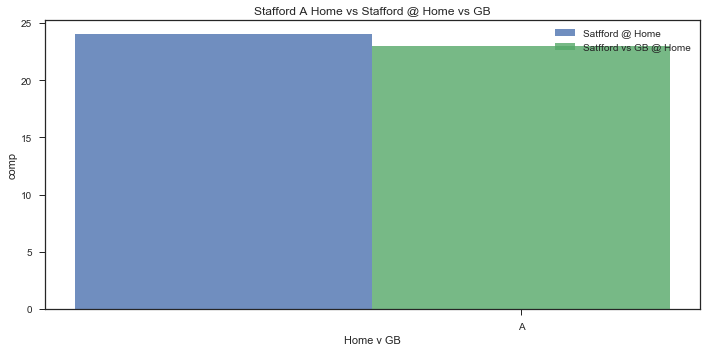

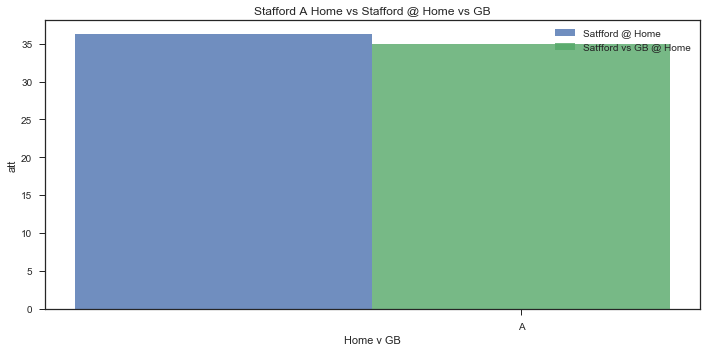

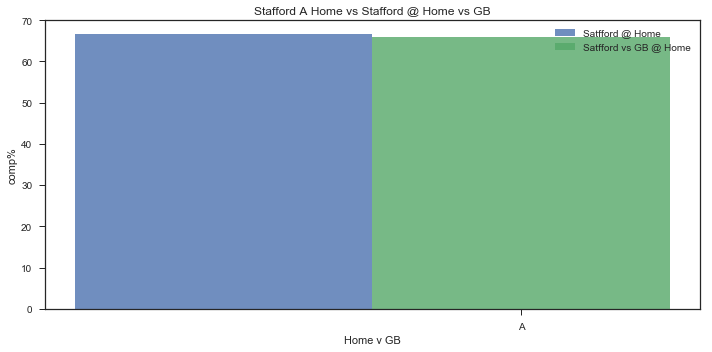

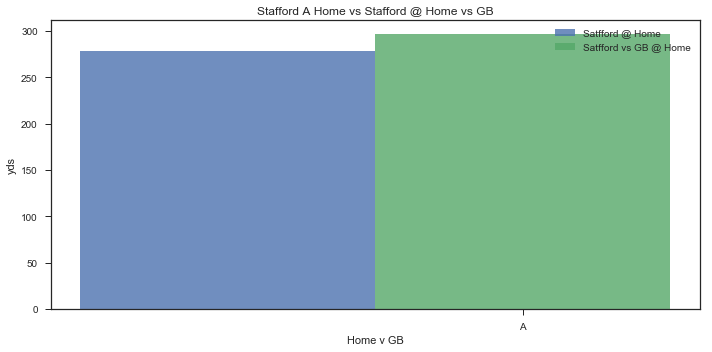

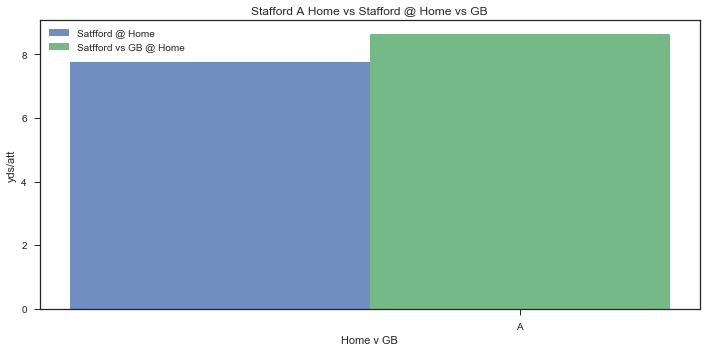

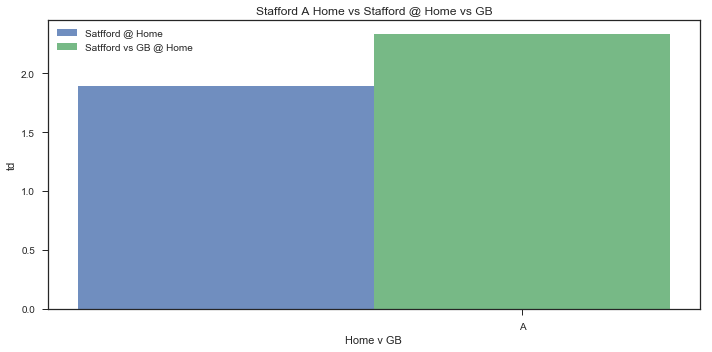

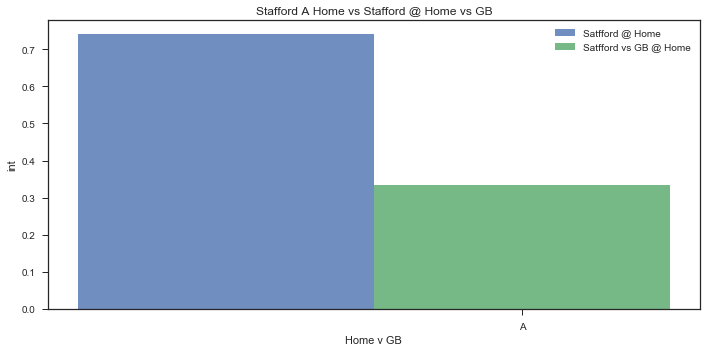

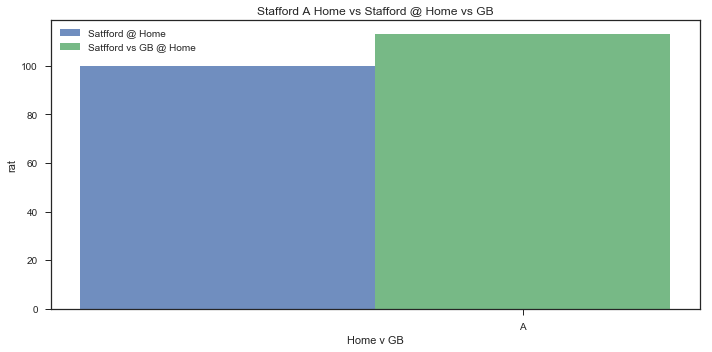

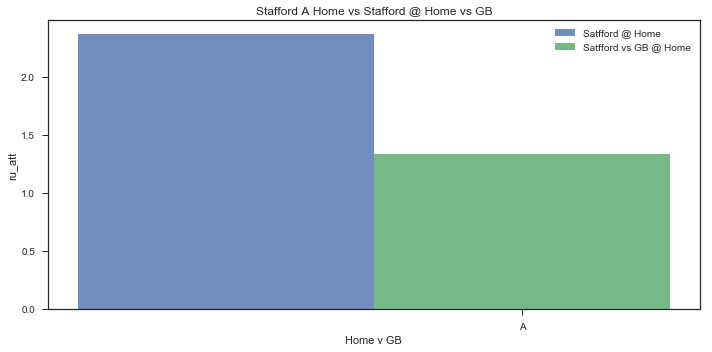

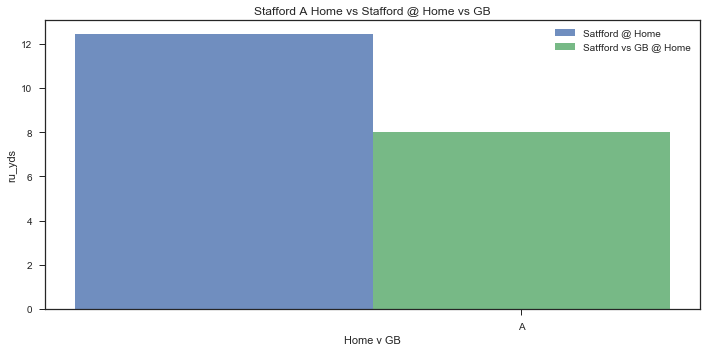

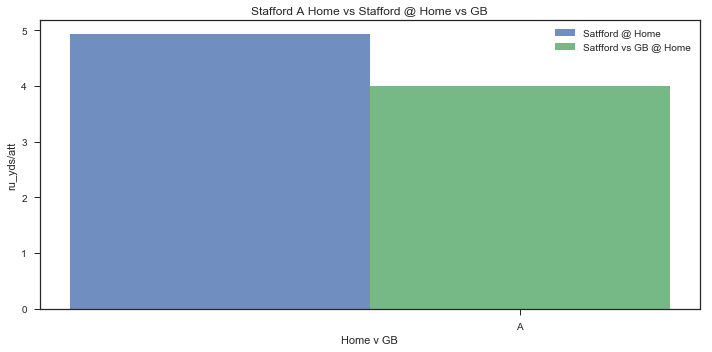

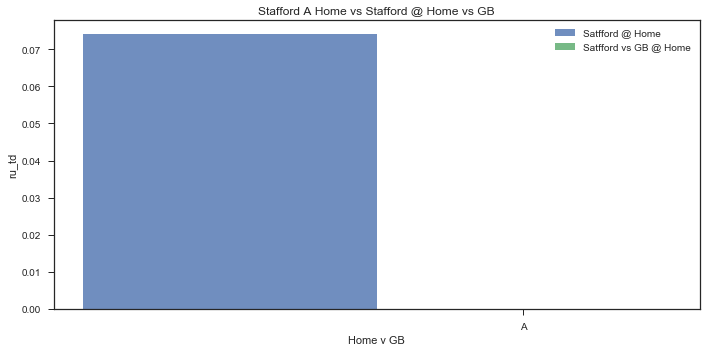

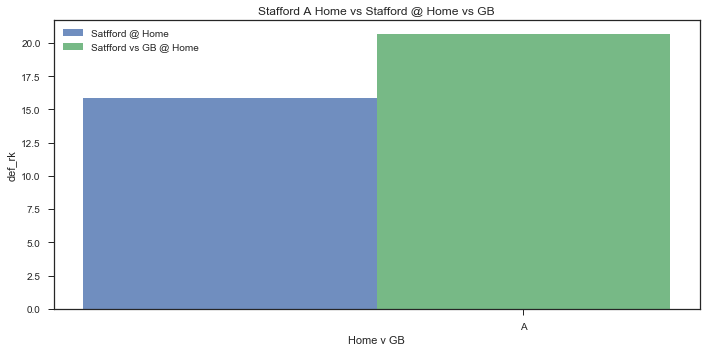

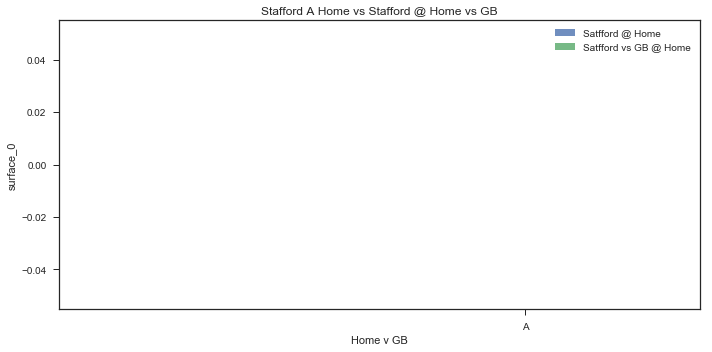

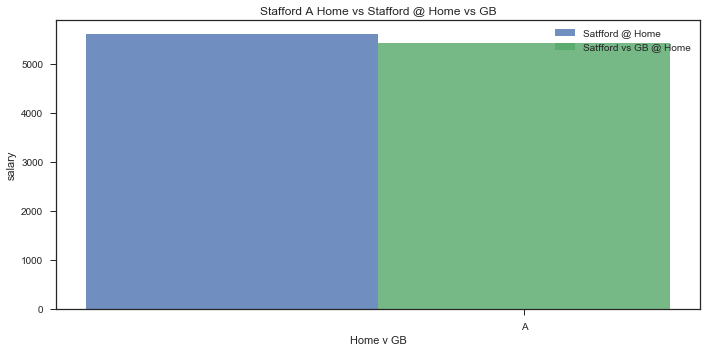

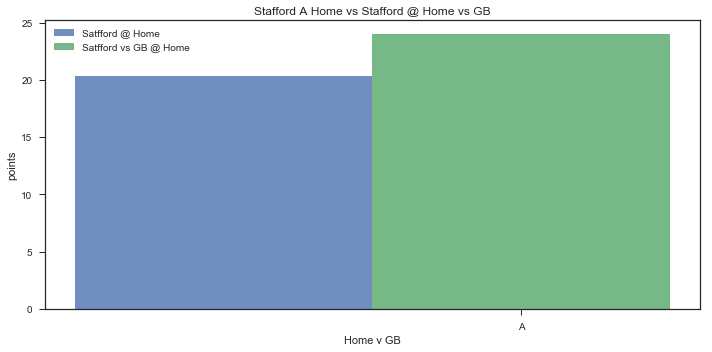

In [38]:
#plt.figure(figsize=(15,15))
for idx in staff_home.index[3:]:
    n_groups =1
    fig, ax = plt.subplots(figsize=(10,5))
    index = np.arange(n_groups)
    bar_width = 0.10
    opacity = 0.8

    rects1 = plt.bar(index, staff_home[idx], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Satfford @ Home')

    rects2 = plt.bar(index + bar_width, staff_vs_GB[idx], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Satfford vs GB @ Home')

    plt.xlabel('Home v GB')
    plt.ylabel(idx)
    plt.title('Stafford A Home vs Stafford @ Home vs GB')
    plt.xticks(index + bar_width, ('A', 'B'))
    plt.legend()

    plt.tight_layout()


In [ ]:
tate_vs_GB = ((qb.groupby(['Name','h/a_1','Opponent']).mean()).loc['Golden Tate']).loc[1.0].loc['GB']

tate = (qb.groupby('Name').mean()).loc['Golden Tate']

tate_home = (qb.groupby(['Name','h/a_1']).mean()).loc['Golden Tate'].loc[1.0]

In [9]:
# Convert attributes from to correct data type
def conv_atts(df):
    df['salary'] = df['salary'].apply(lambda x: int(x))
    df['h/a_1'] = df['h/a_1'].astype('category')
    df['surface_0'] = df['surface_0'].astype('category')
    df['def_rk'] = df['def_rk'].astype('category')
    df['PlayerID'] = df['PlayerID'].astype('category')

    return df

In [11]:
qb = conv_atts(qb)
qb.dtypes

year             int64
PlayerID      category
Name            object
Team            object
Week             int64
Opponent        object
comp             int64
att              int64
comp%          float64
yds              int64
yds/att        float64
td               int64
int              int64
rat            float64
ru_att           int64
ru_yds           int64
ru_yds/att     float64
ru_td            int64
def_rk        category
h/a_1         category
surface_0     category
salary           int64
points         float64
dtype: object

## EDA

In [28]:
qb.tail()

,year,PlayerID,Name,Team,Week,Opponent,comp,att,comp%,yds,...,rat,ru_att,ru_yds,ru_yds/att,ru_td,def_rk,h/a_1,surface_0,salary,points
1910,2018,19763,Josh Rosen,ARI,4,SEA,15,27,55.6,180,...,88.50,2,13,6.5,0,6,1.0,1.0,4300,12.50
1911,2018,19781,Lamar Jackson,BAL,4,PIT,0,0,0.0,0,...,0.00,4,17,4.2,0,31,0.0,1.0,4100,1.70
1912,2018,19790,Baker Mayfield,CLE,4,OAK,21,41,51.2,295,...,70.68,4,10,2.5,0,14,0.0,1.0,5700,16.80
1913,2018,19801,Josh Allen,BUF,4,GB,16,33,48.5,151,...,36.30,5,19,3.8,0,13,0.0,1.0,5600,4.94
1914,2018,19812,Sam Darnold,NYJ,4,JAX,17,34,50.0,167,...,74.02,2,8,4.0,0,1,0.0,1.0,4300,11.48


In [29]:
qb.describe()

,year,Week,comp,att,comp%,yds,yds/att,td,int,rat,ru_att,ru_yds,ru_yds/att,ru_td,salary,points
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,2016.159791,8.643342,18.875718,29.959269,58.702402,215.143081,6.721775,1.327937,0.691906,83.377650,2.644386,11.168146,3.061149,0.107572,5719.216710,15.574862
std,0.959772,5.170318,9.001986,13.582728,19.478462,106.696889,2.840606,1.199977,0.888868,34.124152,2.464675,16.449248,4.234460,0.329529,982.605461,9.537642
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,-5.000000,0.000000,0.000000,-0.940000
25%,2015.000000,4.000000,15.000000,25.000000,54.500000,162.000000,5.600000,0.000000,0.000000,65.950000,1.000000,0.000000,0.000000,0.000000,5000.000000,8.960000
50%,2016.000000,8.000000,20.000000,32.000000,62.200000,231.000000,6.900000,1.000000,0.000000,86.080000,2.000000,4.000000,2.000000,0.000000,5500.000000,15.340000
75%,2017.000000,13.000000,25.000000,39.000000,69.200000,288.000000,8.200000,2.000000,1.000000,106.250000,4.000000,17.000000,5.300000,0.000000,6400.000000,21.740000
max,2018.000000,17.000000,44.000000,66.000000,100.000000,513.000000,35.000000,7.000000,6.000000,158.330000,14.000000,113.000000,70.000000,2.000000,8600.000000,49.300000


Some facts about NFL quaterbacks performance. First the attributes can be broken up into two categories: passing and rushing. There were 1762 quarterbacks that were on active NFL Rosters from 2015 to 2017. There were 107 observations of qbs that did not attempt a pass and most likely did not take a snap in live games. Qbs on average played 9 games a year attempted nearly 30 passes a game with an average completion percentage of  59%. They threw for 214 yds/ga and 1.3 td/game per game. The maximum number of passing attempts was 66 and the maximum number of passing completions was 44. One qb threw for 35 yds/att and someone had a perfect passer rating of 158.3

In [30]:
qb.columns

Index(['year', 'PlayerID', 'Name', 'Team', 'Week', 'Opponent', 'comp', 'att',
       'comp%', 'yds', 'yds/att', 'td', 'int', 'rat', 'ru_att', 'ru_yds',
       'ru_yds/att', 'ru_td', 'def_rk', 'h/a_1', 'surface_0', 'salary',
       'points'],
      dtype='object')

In [31]:
qb['Name'].nunique()

111

In [32]:
# Define a QB's weekly participation as attempting a pass. Therefore, QB's with 0 PassesAttemtpted should be discarded

dnp =[]
for idx, val in enumerate(qb['att']):
    if val ==0:
        dnp.append(idx)

In [33]:
len(dnp)

122

In [34]:
# Drop the 107 observations in which the qb did not participate

qb = qb.drop(dnp)
qb.shape

(1793, 23)

In [35]:
qb[qb['att']==0].count()

year          0
PlayerID      0
Name          0
Team          0
Week          0
Opponent      0
comp          0
att           0
comp%         0
yds           0
yds/att       0
td            0
int           0
rat           0
ru_att        0
ru_yds        0
ru_yds/att    0
ru_td         0
def_rk        0
h/a_1         0
surface_0     0
salary        0
points        0
dtype: int64

In [36]:
qb[qb['Name'] =='Baker Mayfield'].describe()

,year,Week,comp,att,comp%,yds,yds/att,td,int,rat,ru_att,ru_yds,ru_yds/att,ru_td,salary,points
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000
mean,2018.0,3.500000,19.000000,32.000000,62.550000,248.000000,7.95000,1.000000,1.000000,85.38500,3.000000,4.000000,0.750000,0.0,5750.000000,13.320000
std,0.0,0.707107,2.828427,12.727922,16.051324,66.468037,1.06066,1.414214,1.414214,20.79601,1.414214,8.485281,2.474874,0.0,70.710678,4.921463
min,2018.0,3.000000,17.000000,23.000000,51.200000,201.000000,7.20000,0.000000,0.000000,70.68000,2.000000,-2.000000,-1.000000,0.0,5700.000000,9.840000
25%,2018.0,3.250000,18.000000,27.500000,56.875000,224.500000,7.57500,0.500000,0.500000,78.03250,2.500000,1.000000,-0.125000,0.0,5725.000000,11.580000
50%,2018.0,3.500000,19.000000,32.000000,62.550000,248.000000,7.95000,1.000000,1.000000,85.38500,3.000000,4.000000,0.750000,0.0,5750.000000,13.320000
75%,2018.0,3.750000,20.000000,36.500000,68.225000,271.500000,8.32500,1.500000,1.500000,92.73750,3.500000,7.000000,1.625000,0.0,5775.000000,15.060000
max,2018.0,4.000000,21.000000,41.000000,73.900000,295.000000,8.70000,2.000000,2.000000,100.09000,4.000000,10.000000,2.500000,0.0,5800.000000,16.800000


In [17]:
total_points = qb['points'].sum()
total_points

29814.56000000002

In [19]:
total_games = qb["points"].count()
total_games

1793

In [27]:
passing_cols=[]
rushing_cols = []
for col in qb.columns:
    if 'ru' in col:
        rushing_cols.append(col)
    else:
        passing_cols.append(col)
        

rushing_cols.append('points')

In [28]:
rem_lst = ['Name','PlayerID','Opponent','Team','year','Week','def_rk','h/a_1','surface_0']
for val in rem_lst:
    passing_cols.remove(val)

In [29]:
passing_cols

['comp',
 'att',
 'comp%',
 'yds',
 'yds/att',
 'td',
 'int',
 'rat',
 'salary',
 'points']

In [30]:
rushing_cols

['ru_att', 'ru_yds', 'ru_yds/att', 'ru_td', 'points']

In [31]:
cat_cols=['Name','td','ru_td', 'int', 'salary', 'def_rk', 'h/a_1', 'surface_0']
cat_cols.append('points')

In [32]:
qb[cat_cols].head()

,Name,td,ru_td,int,salary,def_rk,h/a_1,surface_0,points
0,Joe Flacco,0,0,2,6700,1,0.0,1.0,2.68
1,Matt Ryan,2,0,2,7500,30,1.0,0.0,18.62
2,Carson Palmer,3,0,0,6500,32,1.0,1.0,28.68
3,Aaron Rodgers,3,0,0,8600,25,0.0,1.0,23.06
4,Ben Roethlisberger,1,0,1,7300,15,0.0,0.0,22.04


In [50]:
passing_cols

['Name', 'points']

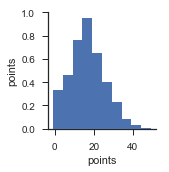

In [49]:
sns.pairplot(qb[passing_cols])

In [82]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

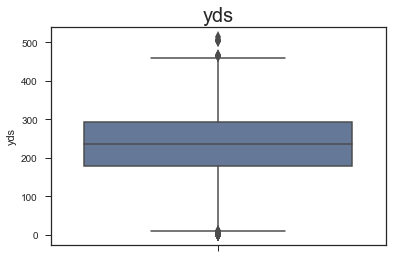

In [85]:
boxplotter(qb,'yds')

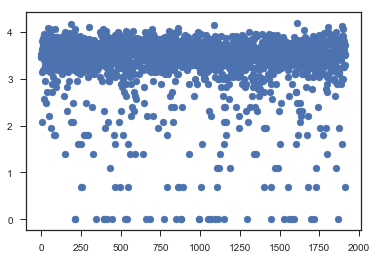

In [90]:
plt.scatter(qb.index,np.log(qb['att']))

## MATTY ICE
A breakdown of how Matt Ryan, a quarterback for the Atlanta Falcons, has performed from 2015-2018.

In [124]:
matty_ice = qb_df[qb_df['Name'] =='Matt Ryan']
matty_ice.reset_index(inplace=True, drop=True)
matty_ice.describe()['FantasyPointsDraftKings'].mean()

22.617064224631353

In [118]:
matty_ice[passing_cols]

,Name,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,FantasyPointsDraftKings
0,Matt Ryan,23,34,67.6,298,8.8,2,2,90.07,18.62
1,Matt Ryan,30,46,65.2,363,7.9,1,0,96.56,21.42
2,Matt Ryan,24,36,66.7,285,7.9,2,0,109.14,23.10
3,Matt Ryan,19,27,70.4,256,9.5,1,0,112.58,14.14
4,Matt Ryan,24,42,57.1,254,6.0,0,2,55.06,9.16
5,Matt Ryan,30,44,68.2,295,6.7,2,0,101.99,19.80
6,Matt Ryan,22,38,57.9,251,6.6,1,2,64.69,11.74
7,Matt Ryan,37,45,82.2,397,8.8,2,1,108.98,25.08
8,Matt Ryan,30,45,66.7,303,6.7,1,0,93.10,19.32
9,Matt Ryan,25,46,54.3,280,6.1,3,3,67.30,20.90


In [58]:
home_ice = (matty_ice[matty_ice['h/a1']==1]).reset_index(drop=True)
away_ice = (matty_ice[matty_ice['h/a1']==0]).reset_index(drop=True)


home_ice['games'] = home_ice.index+1
away_ice['games'] = away_ice.index+1

avg_home_pts = home_ice['FantasyPointsDraftKings'].mean()
avg_away_pts = away_ice['FantasyPointsDraftKings'].mean()
print(avg_home_pts,avg_away_pts)

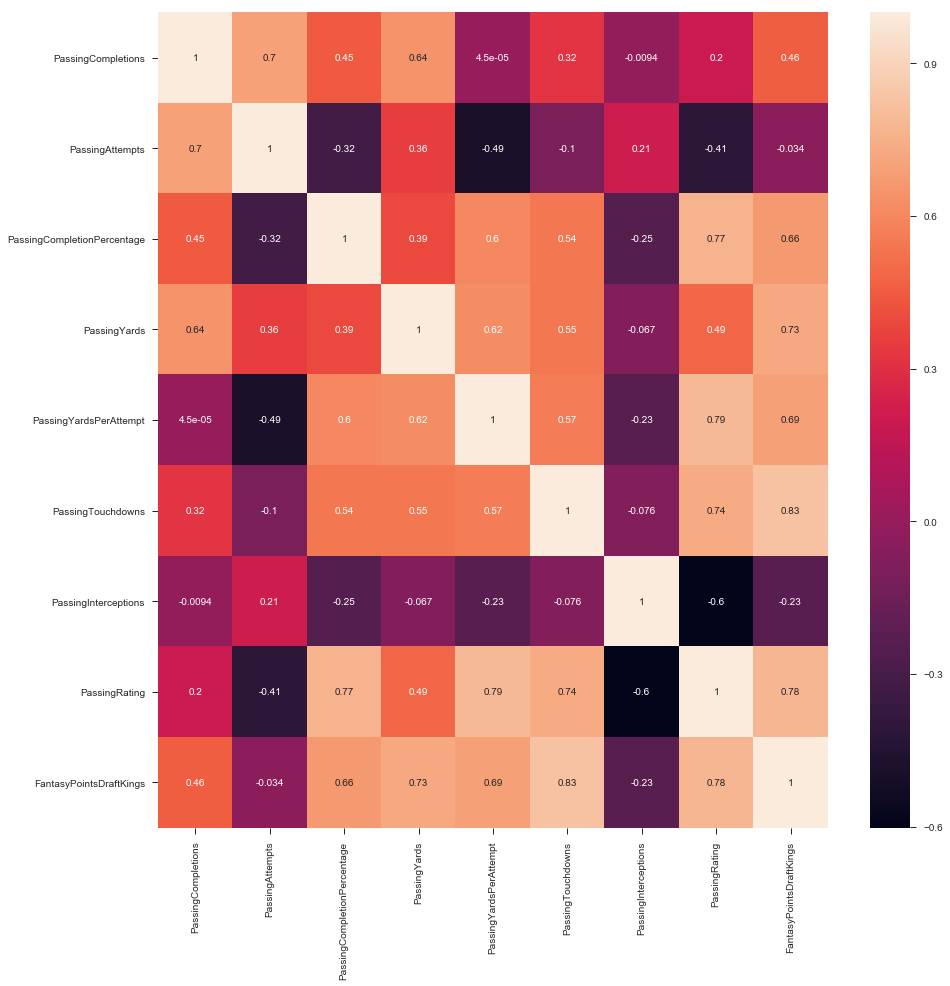

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(matty_ice[passing_cols].corr(), annot=True)

In [49]:
matty_ice['games'] = matty_ice.index +1
matty_ice

C:\Users\bobal\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PlayerID,Name,Team,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,...,year,def_rk,h/a,surface,h/a0,h/a1,surface_0,surface_1,FantasyPointsDraftKings,games
0,732,Matt Ryan,ATL,1,PHI,23,34,67.6,298,8.8,...,2015,30,home,turf,0.0,1.0,0.0,1.0,18.62,1
1,732,Matt Ryan,ATL,2,NYG,30,46,65.2,363,7.9,...,2015,31,away,turf,1.0,0.0,0.0,1.0,21.42,2
2,732,Matt Ryan,ATL,3,DAL,24,36,66.7,285,7.9,...,2015,5,away,turf,1.0,0.0,0.0,1.0,23.10,3
3,732,Matt Ryan,ATL,4,HOU,19,27,70.4,256,9.5,...,2015,4,home,turf,0.0,1.0,0.0,1.0,14.14,4
4,732,Matt Ryan,ATL,5,WAS,24,42,57.1,254,6.0,...,2015,21,home,turf,0.0,1.0,0.0,1.0,9.16,5
5,732,Matt Ryan,ATL,6,NO,30,44,68.2,295,6.7,...,2015,32,away,turf,1.0,0.0,0.0,1.0,19.80,6
6,732,Matt Ryan,ATL,7,TEN,22,38,57.9,251,6.6,...,2015,27,away,grass,1.0,0.0,1.0,0.0,11.74,7
7,732,Matt Ryan,ATL,8,TB,37,45,82.2,397,8.8,...,2015,22,home,turf,0.0,1.0,0.0,1.0,25.08,8
8,732,Matt Ryan,ATL,9,SF,30,45,66.7,303,6.7,...,2015,16,away,grass,1.0,0.0,1.0,0.0,19.32,9
9,732,Matt Ryan,ATL,11,IND,25,46,54.3,280,6.1,...,2015,26,home,turf,0.0,1.0,0.0,1.0,20.90,10


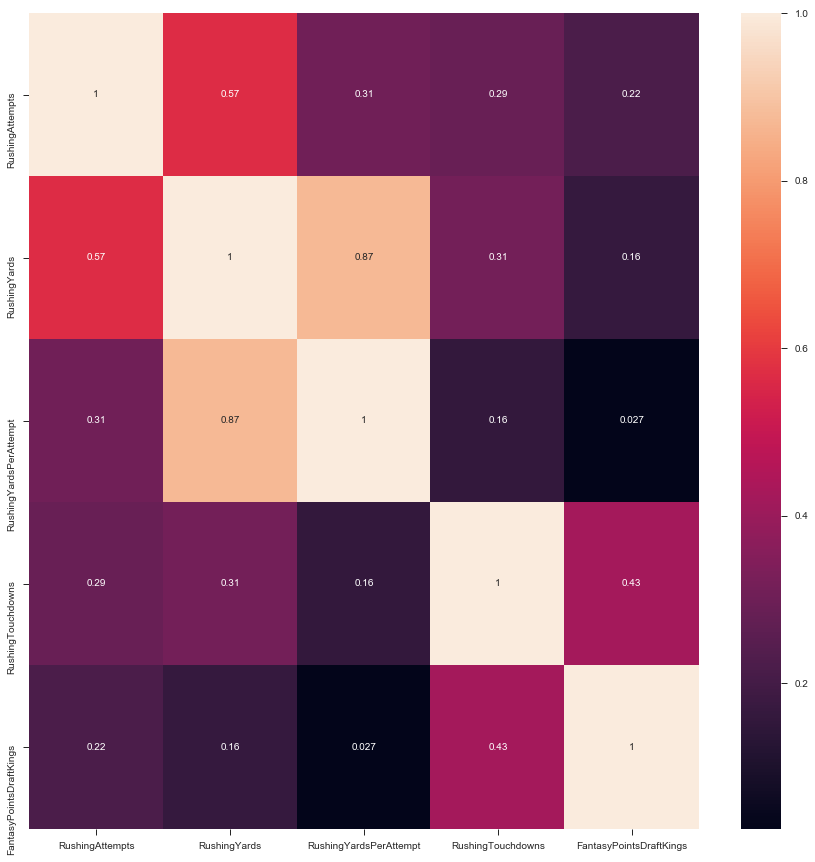

In [121]:
plt.figure(figsize=(15,15))
sns.heatmap(matty_ice[rushing_cols].corr(), annot=True)

## BIG BEN

In [21]:
big_ben = qb_df[qb_df['Name'] =='Ben Roethlisberger']
big_ben.reset_index(inplace=True, drop=True)
big_ben.describe()['FantasyPointsDraftKings'].mean()

NameError: name 'qb_df' is not defined

In [110]:
qb_df.to_csv('../input/qb/dk_qb_loc.csv', index=False)

In [54]:
qb_df['surface_encoded'] = qb_df['surface_encoded'].values.reshape(-1,1)

In [ ]:
plt.bar()

In [112]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

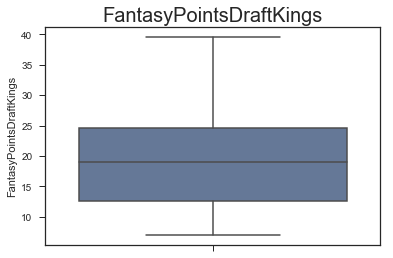

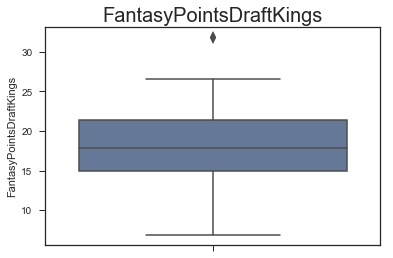

In [114]:
boxplotter(home_ice, 'FantasyPointsDraftKings')
boxplotter(away_ice, 'FantasyPointsDraftKings')

In [ ]:
bins = np.linspace(0, 50, 50)

_ = plt.hist(ar['points'], bins, alpha=0.5, label='Rodgers career points')
_ = plt.hist(ar_18['points'], bins, alpha=0.5, label='Rodgers 2018 points')
_ = plt.legend(loc='upper right')
plt.show()
    

In [102]:
qb[passing_cols][:10]

,comp,att,comp%,yds,yds/att,td,int,rat,salary,points
0,18,32,56.2,117,3.7,0,2,38.15,6700,2.68
1,23,34,67.6,298,8.8,2,2,90.07,7500,18.62
2,19,32,59.4,307,9.6,3,0,122.79,6500,28.68
3,18,23,78.3,189,8.2,3,0,140.49,8600,23.06
4,26,38,68.4,351,9.2,1,1,95.39,7300,22.04
5,36,45,80.0,356,7.9,3,2,103.33,7300,27.14
6,25,32,78.1,288,9.0,4,0,143.75,7700,27.62
7,20,36,55.6,189,5.2,0,0,70.25,7400,8.36
8,5,8,62.5,49,6.1,0,0,79.69,5200,3.26
10,22,33,66.7,243,7.4,3,0,118.62,8000,23.22


## Outliers

In [76]:
qb.dtypes

year             int64
PlayerID      category
Name            object
Team            object
Week             int64
Opponent        object
comp             int64
att              int64
comp%          float64
yds              int64
yds/att        float64
td               int64
int              int64
rat            float64
ru_att           int64
ru_yds           int64
ru_yds/att     float64
ru_td            int64
def_rk        category
h/a_1         category
surface_0     category
salary           int64
points         float64
dtype: object

In [80]:
def get_outliers(df):
    #rem_cols = ['Week','Year','Name','Opponent','Team']
    col_dict ={}
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_dict.update({col:df[col].describe()})

    col_name = []
    outliers_lst = []
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_name.append(col)
            outliers_lst.append(len(abs(df[col]-col_dict[col]['mean'])[df[col] > (col_dict[col]['std'])*3]))
            
    outliers= pd.DataFrame()
    outliers['col_name'] = col_name
    outliers['# of outliers'] = outliers_lst
    


    

    percent_lst = [ ]
    for idx, val in enumerate(outliers['# of outliers']):
        percent_lst.append(val/int(df.shape[0])*100)

    outliers['pecent'] = percent_lst
    outliers = outliers.drop(outliers.index[:2])



    return outliers

In [81]:
get_outliers(qb)

,col_name,# of outliers,pecent
2,comp,594,33.128834
3,att,791,44.116007
4,yds,525,29.280535
5,td,100,5.577245
6,int,82,4.573341
7,ru_att,96,5.354155
8,ru_yds,70,3.904071
9,ru_td,12,0.669269
10,salary,1789,99.776910


In [103]:
qb['log_att'] = qb['att'].apply(lambda x: np.log10(x))
qb['log_comp'] = qb['comp'].apply(lambda x: np.log10(x))
qb['log_yds'] = qb['yds'].apply(lambda x: np.log10(x))

In [104]:
qb.head()

,year,PlayerID,Name,Team,Week,Opponent,comp,att,comp%,yds,...,ru_yds/att,ru_td,def_rk,h/a_1,surface_0,salary,points,log_att,log_comp,log_yds
0,2015,611,Joe Flacco,BAL,1,DEN,18,32,56.2,117,...,0.0,0,1,0.0,1.0,6700,2.68,1.505150,1.255273,2.068186
1,2015,732,Matt Ryan,ATL,1,PHI,23,34,67.6,298,...,1.4,0,30,1.0,0.0,7500,18.62,1.531479,1.361728,2.474216
2,2015,2428,Carson Palmer,ARI,1,NO,19,32,59.4,307,...,4.7,0,32,1.0,1.0,6500,28.68,1.505150,1.278754,2.487138
3,2015,2593,Aaron Rodgers,GB,1,CHI,18,23,78.3,189,...,4.4,0,25,0.0,1.0,8600,23.06,1.361728,1.255273,2.276462
4,2015,3807,Ben Roethlisberger,PIT,1,NE,26,38,68.4,351,...,0.0,0,15,0.0,0.0,7300,22.04,1.579784,1.414973,2.545307


In [96]:
pass_corr = qb[passing_cols].corr()
rush_corr = qb[rushing_cols].corr()

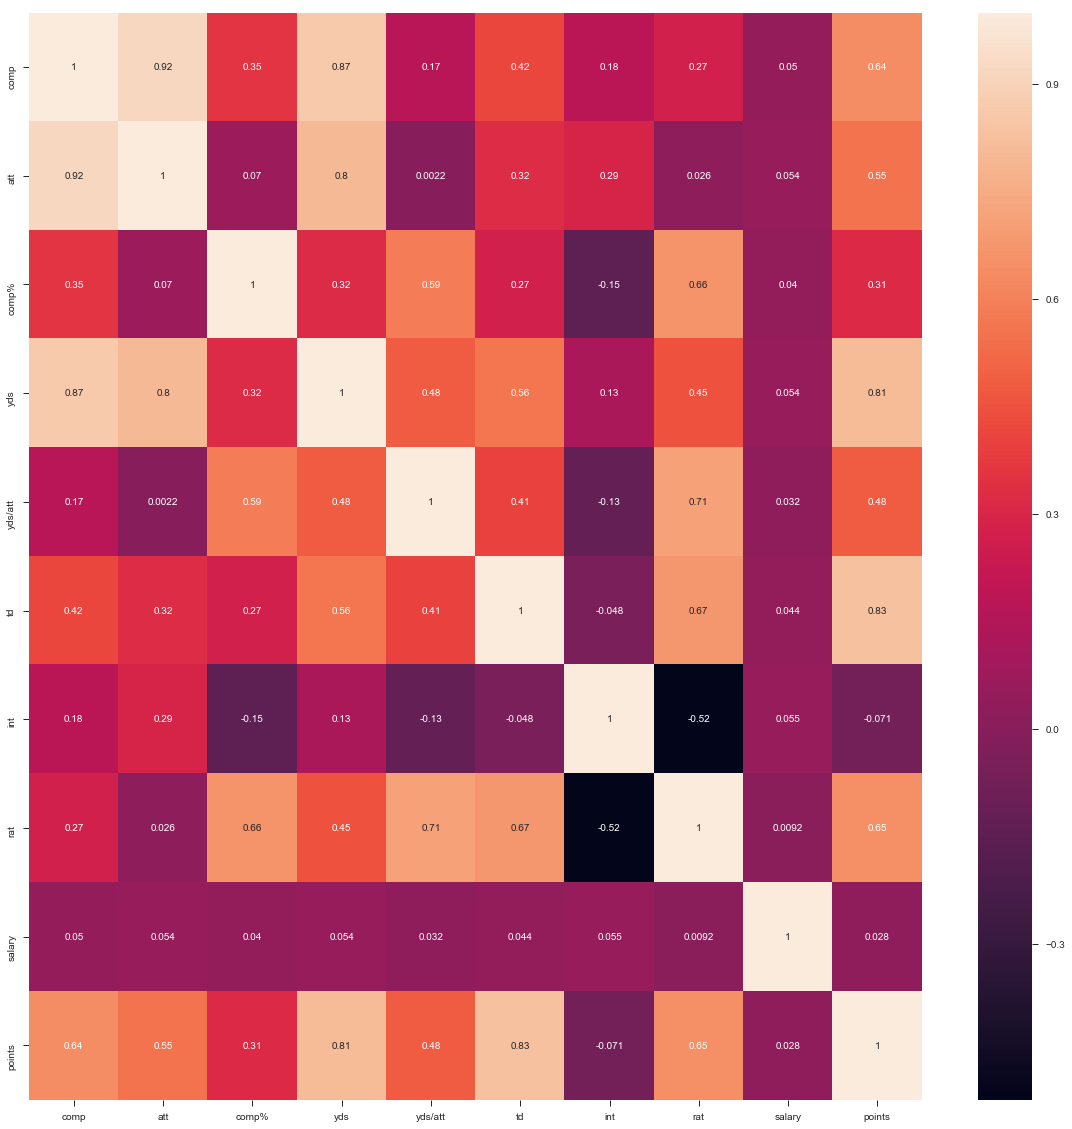

In [98]:
plt.figure(figsize = (20,20))
sns.heatmap(pass_corr, annot=True)

In [93]:
qb = pd.concat([yearly_dict['player_2015'], yearly_dict['player_2016']])
qb = pd.concat([qb, yearly_dict['player_2017']])
qb = pd.concat([qb, yearly_dict['player_2018']])

In [99]:
qb.drop('Unnamed: 0', axis=1, inplace=True)


In [100]:
qb.head()

PlayerID  att  comp  comp%  def_rk  int  points  \
Name        Week Opponent                                                    
AJ McCarron 12   LAR          16116    1     1  100.0      10    0    0.12   
            13   CLE          16116    3     2   66.7      28    0    0.76   
            14   PIT          16116   32    22   68.8      24    2   18.00   
            15   SF           16116   21    15   71.4      16    0   11.88   
            16   DEN          16116   35    22   62.9       1    0   13.10   

                              rat  ru_att  ru_td  ru_yds  ru_yds/att  salary  \
Name        Week Opponent                                                      
AJ McCarron 12   LAR        79.17       0      0       0         0.0    6000   
            13   CLE        84.03       0      0       0         0.0    5000   
            14   PIT        90.62       3      0       8         2.7    5000   
            15   SF        115.58       2      0       2         1.0    3000   
            16   DEN        87.80       4      0      21         5.2    5100   

                           td  yds  yds/att  h/a_encoded  surface_encoded  
Name        Week Opponent                                                  
AJ McCarron 12   LAR        0    3      3.0            1                1  
            13   CLE        0   19      6.3            1                1  
            14   PIT        2  280      8.8            1                1  
            15   SF         1  192      9.1            1                1  
            16   DEN        1  200      5.7            1                1

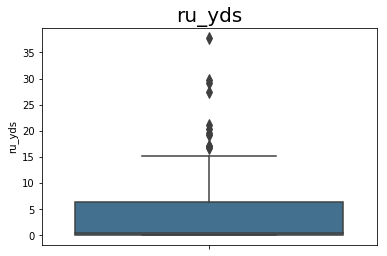

In [29]:
boxplotter(week1,'ru_yds')

boxplotter(qb, 'Yds/Att')

boxplotter(qb,'Comp')

boxplotter(qb,'TD')

boxplotter(qb,'Int')

Text(0.5,1,'Qb Stats')

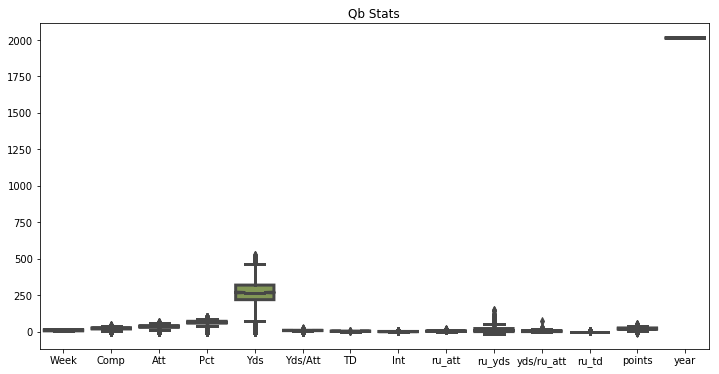

In [55]:
fig = plt.figure(figsize=(12,6))

ax = sns.boxplot(data=qb, orient='v', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5)

ax.set_title('Qb Stats')

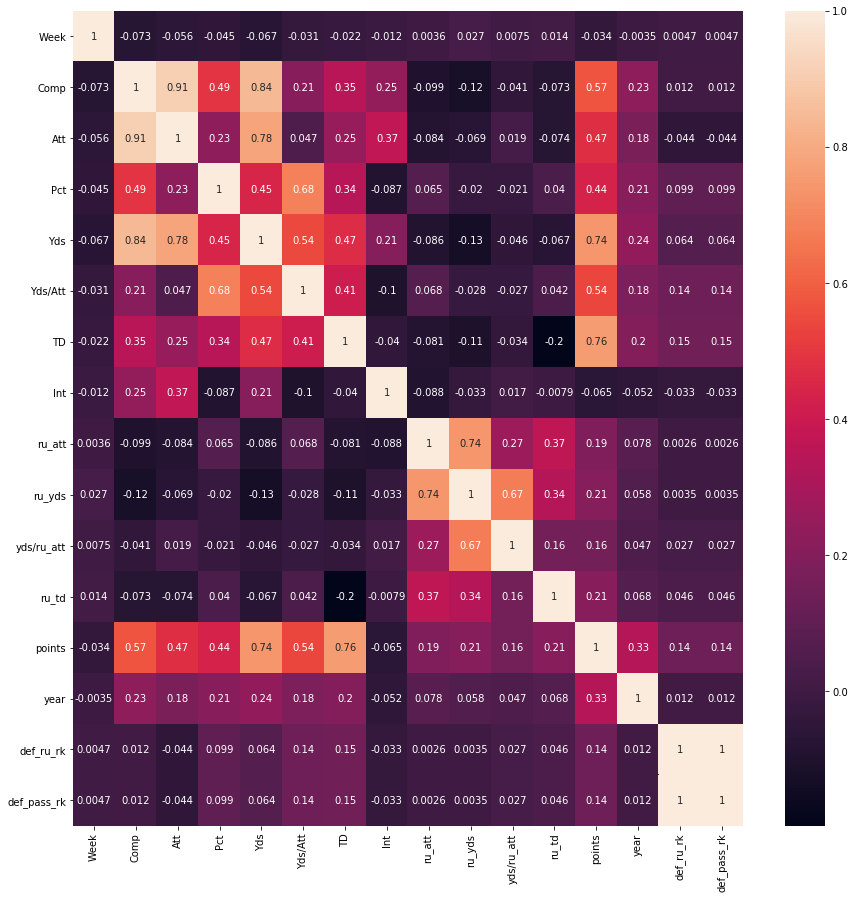

In [340]:
plt.figure(figsize=(15,15))
sns.heatmap(qb.corr(), annot=True)

## Reversion to the Mean

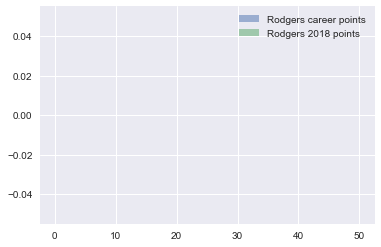

In [20]:
ar = qb[qb['Name']=='Aaron Rodgers']
ar_18 = ar[ar['year']==2018]

bins = np.linspace(0, 50, 50)

_ = plt.hist(ar['points'], bins, alpha=0.5, label='Rodgers career points')
_ = plt.hist(ar_18['points'], bins, alpha=0.5, label='Rodgers 2018 points')
_ = plt.legend(loc='upper right')
plt.show()
    

In [33]:
rushing_cols =[]
for col in qb.columns:
    if 'ru' in col:
        rushing_cols.append(col)
        

In [34]:

rushing_cols.append('comp')
rushing_cols.append('yds/att')
rushing_cols.append('int')
qb_eda = qb.drop(rushing_cols, axis=1)

In [35]:
cols = qb_eda.columns.tolist()
cols = cols[:-5] + cols[-3:] + cols[-5:-3]
qb_eda = qb_eda[cols]

In [36]:
qb_eda.head()

,year,PlayerID,Name,Team,Week,Opponent,att,comp%,yds,td,rat,surface_0,salary,points,def_rk,h/a_1
0,2015,611,Joe Flacco,BAL,1,DEN,32,56.2,117,0,38.15,1.0,6700,2.68,1,0.0
1,2015,732,Matt Ryan,ATL,1,PHI,34,67.6,298,2,90.07,0.0,7500,18.62,30,1.0
2,2015,2428,Carson Palmer,ARI,1,NO,32,59.4,307,3,122.79,1.0,6500,28.68,32,1.0
3,2015,2593,Aaron Rodgers,GB,1,CHI,23,78.3,189,3,140.49,1.0,8600,23.06,25,0.0
4,2015,3807,Ben Roethlisberger,PIT,1,NE,38,68.4,351,1,95.39,0.0,7300,22.04,15,0.0


In [37]:
qb_eda.drop('PlayerID', axis=1, inplace=True)

In [40]:
qb_eda.to_csv('../input/qb/qb_loc_cleaned.csv', index=False)

In [39]:
qb_eda.isnull().sum()

year         0
Name         0
Team         0
Week         0
Opponent     0
att          0
comp%        0
yds          0
td           0
rat          0
surface_0    0
salary       0
points       0
def_rk       0
h/a_1        0
dtype: int64

In [323]:
results.shape

(300, 3)

In [84]:
results.to_csv('2018_week1_qb.csv', index= False)